# Day 1 PM: Visualizing data with `ggplot2`

In [1]:
suppressPackageStartupMessages(library(tidyverse))

Warning message:
“Installed Rcpp (0.12.12) different from Rcpp used to build dplyr (0.12.11).
Please reinstall dplyr to avoid random crashes or undefined behavior.”Warning message:
“package ‘dplyr’ was built under R version 3.4.1”

In [2]:
options(repr.plot.width=6, repr.plot.height=3)

## The Grammar of Graphics

When constructing a visualization, we are mapping data elements (annotation, categories, numbers, time series) to visual elements (coordinates, color, size, movement). So the first step in designing a graphic is to decide on

- a **data set** (usually a `data.frame` with observations in rows and variables in columns)
- a **mapping** from date element to visual element (e.g. map height to x-coordinate, weight to y-coordinate, age to color)
- the **type of plot(s)** desired e.g., bar chart or box plot. Several types can sometimes be overlaid e.g., scatter plot with overlaid linear regression.

After that, we can customize the visual elements in several ways

- direct setting of visual element attributes (size, thickness, color, transparency)
- adding labels (title, subtitle, x-axis label, y-axis label)a
- adding guides (legend, color bar)
- adding annotations (text labels, arrows)
- changing coordinate systems (Cartesian to polar, linear to log)
- changing color scales (color palettes and color maps)
- changing graphic extents (minimum and maximum values displayed)

For global changes to the look and feel of visual elements, we can set styles or themes that simultaneously alter many graphical aspects - background and foreground colors, color scheme, font family used etc.

Sometimes, we need to display multiple plots in a single graphic. To do so, we create a layout that specifies how different plots are related to each other (relative size, sharing of axes). There are two kinds of layouts

- plots are related (i.e. belong to the same data set and type, differ only in choice or subgroup of data elements presented)
- plots are unrelated

Finally, we often need to save the graphic to a file for later viewing or inclusion in a report.

The `ggplot2` package provides a **grammar** to describe these actions and build them up incrementally, allowing flexible and powerful construction of informative statistical visualizations.

## Example data set 1

In [3]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


### Mapping with `aes`

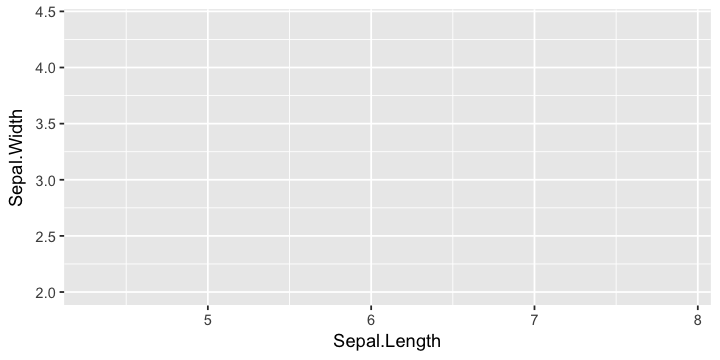

In [4]:
g <- ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width,
                      color=Species, fill=Species))
g

### Plots with `geom`

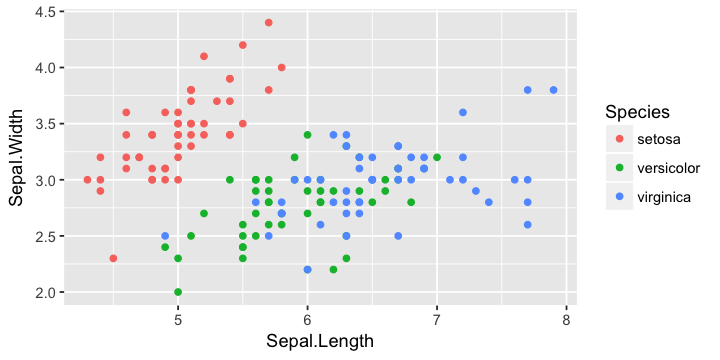

In [5]:
g <- g + geom_point()
g

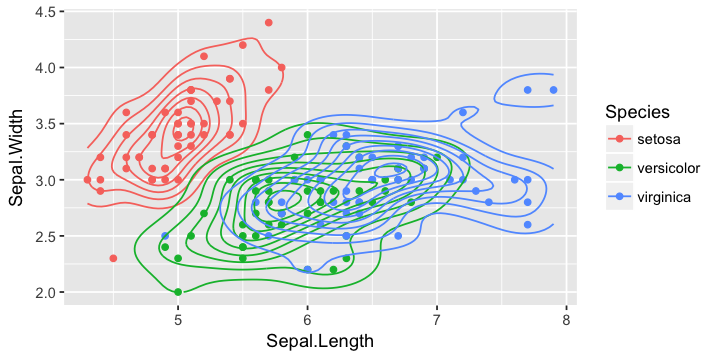

In [6]:
g + geom_density_2d()

`geom_smooth()` using method = 'loess'


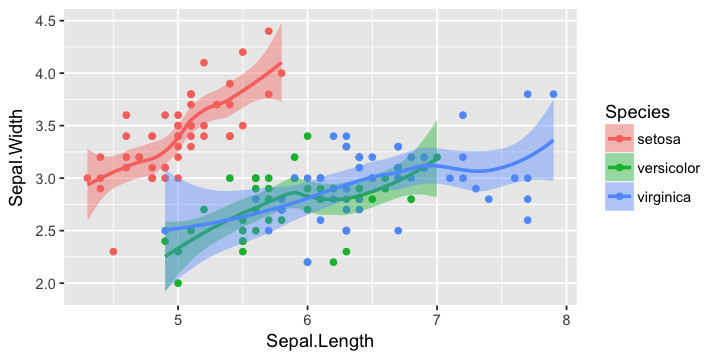

In [7]:
g + 
geom_smooth()

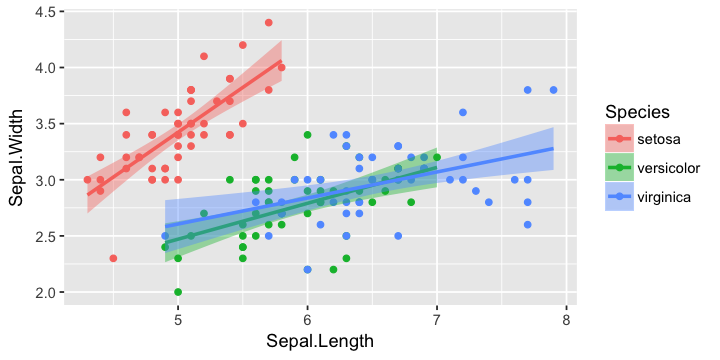

In [8]:
g + 
geom_smooth(method=`lm`)

### Change of `coord`

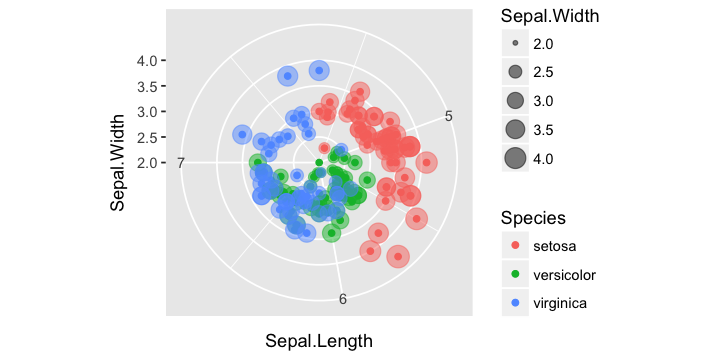

In [9]:
g + geom_point(aes(size=Sepal.Width), alpha=0.5) +
coord_polar()

### Change of `scale`

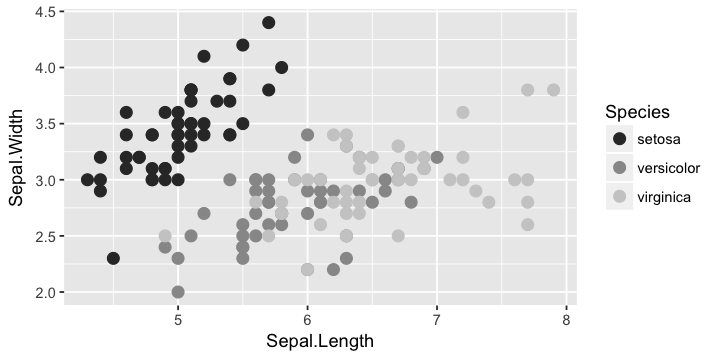

In [10]:
g + geom_point(size=3) + scale_color_grey()

### Facets

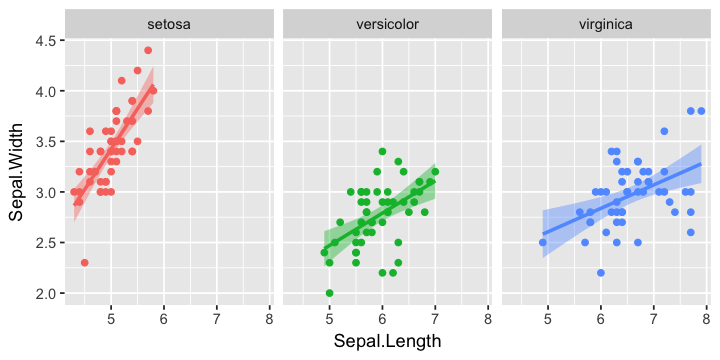

In [11]:
g + 
geom_smooth(method='lm') +
facet_wrap(~ Species) +
guides(color=F, fill=F)

#### Preview of data manipulation

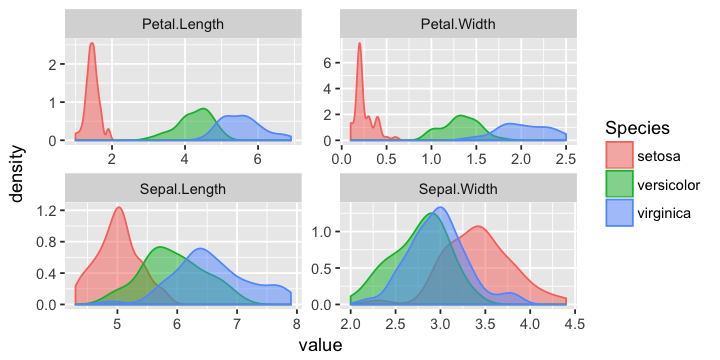

In [12]:
ggplot(iris %>% gather(measure, value, -Species),
      aes(x=value, fill=Species, color=Species)) +
facet_wrap(~ measure, ncol=2, scales = "free") +
geom_density(alpha=0.5)

### Themes

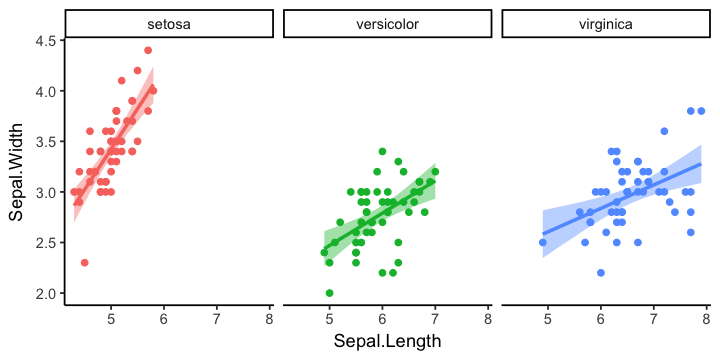

In [13]:
g + 
geom_smooth(method='lm') +
facet_wrap(~ Species) +
guides(color=F, fill=F) +
theme_classic()

## Example data set 2

### Australian AIDS Survival Data

URL: https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/MASS/Aids2.csv

<p>This data frame contains 2843 rows and the following columns:
</p>

<dl>
<dt><code>state</code></dt><dd>
<p>Grouped state of origin: <code>"NSW "</code>includes ACT and
<code>"other"</code> is WA, SA, NT and TAS.
</p>
</dd>
<dt><code>sex</code></dt><dd>
<p>Sex of patient.
</p>
</dd>
<dt><code>diag</code></dt><dd><p>(Julian) date of diagnosis.</p>
</dd>
<dt><code>death</code></dt><dd>
<p>(Julian) date of death or end of observation.
</p>
</dd>
<dt><code>status</code></dt><dd>
<p><code>"A"</code> (alive) or <code>"D"</code> (dead) at end of observation.
</p>
</dd>
<dt><code>T.categ</code></dt><dd>
<p>Reported transmission category.
</p>
</dd>
<dt><code>age</code></dt><dd>
<p>Age (years) at diagnosis.
</p>
</dd>
</dl>

Note: Julian dates are simply a continuous count of days and fractions since noon Universal Time on January 1, 4713 BC.

In [14]:
url <- "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/MASS/Aids2.csv"
df <- read.csv(url)

#### Preview of data manipulation

In [15]:
df <- df %>% mutate(surv = death - diag)

In [16]:
head(df)

X,state,sex,diag,death,status,T.categ,age,surv
1,NSW,M,10905,11081,D,hs,35,176
2,NSW,M,11029,11096,D,hs,53,67
3,NSW,M,9551,9983,D,hs,42,432
4,NSW,M,9577,9654,D,haem,44,77
5,NSW,M,10015,10290,D,hs,39,275
6,NSW,M,9971,10344,D,hs,36,373


In [17]:
str(df)

'data.frame':	2843 obs. of  9 variables:
 $ X      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ state  : Factor w/ 4 levels "NSW","Other",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sex    : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ diag   : int  10905 11029 9551 9577 10015 9971 10746 10042 10464 10439 ...
 $ death  : int  11081 11096 9983 9654 10290 10344 11135 11069 10956 10873 ...
 $ status : Factor w/ 2 levels "A","D": 2 2 2 2 2 2 2 2 2 2 ...
 $ T.categ: Factor w/ 8 levels "blood","haem",..: 4 4 4 2 4 4 8 4 4 5 ...
 $ age    : int  35 53 42 44 39 36 36 31 26 27 ...
 $ surv   : int  176 67 432 77 275 373 389 1027 492 434 ...


## Mapping with `aes`

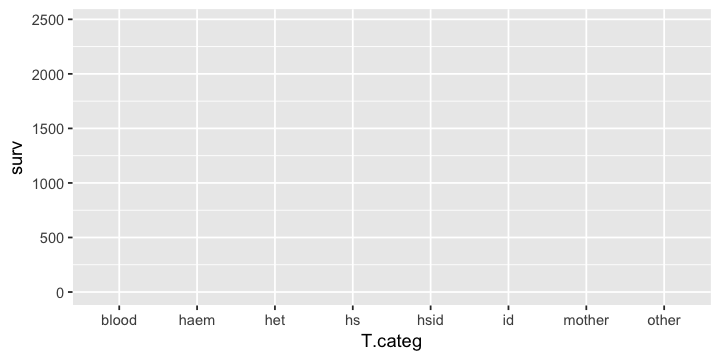

In [18]:
g1 <- ggplot(df, aes(x=T.categ, y=surv, color=sex, fill=sex))
g1

## Plotting with `geom`

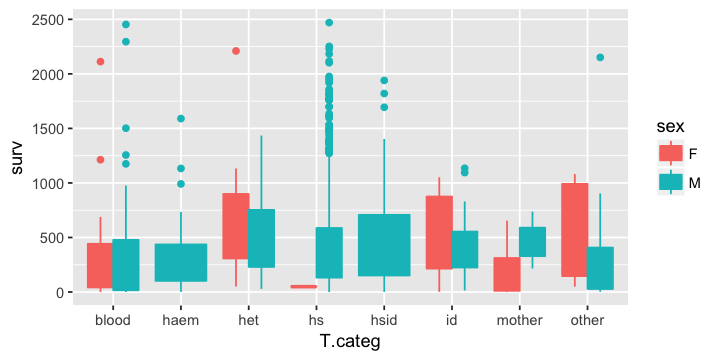

In [19]:
g1 + geom_boxplot()

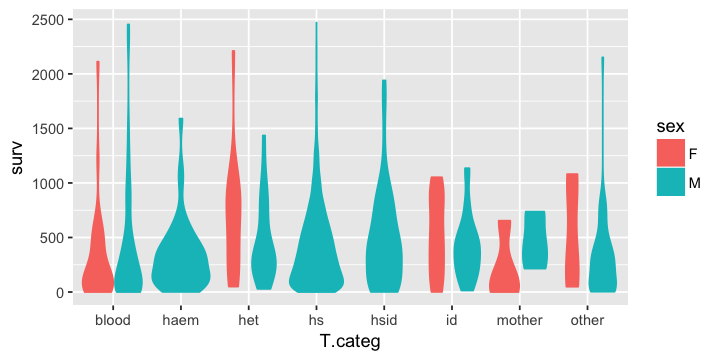

In [20]:
g1 + geom_violin()

## Graphic attributes

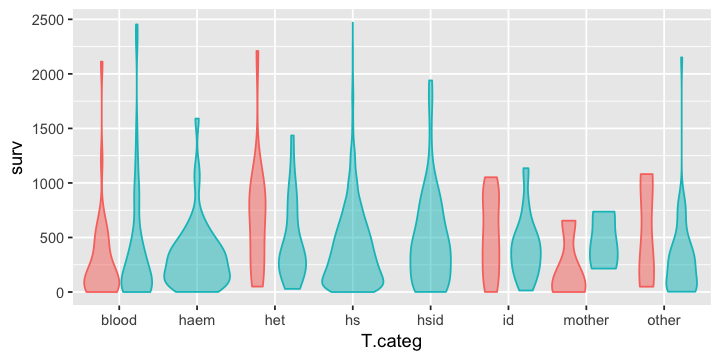

In [21]:
g1 + geom_violin(alpha=0.5, show.legend = F)

## Changing coordinates with `coord`

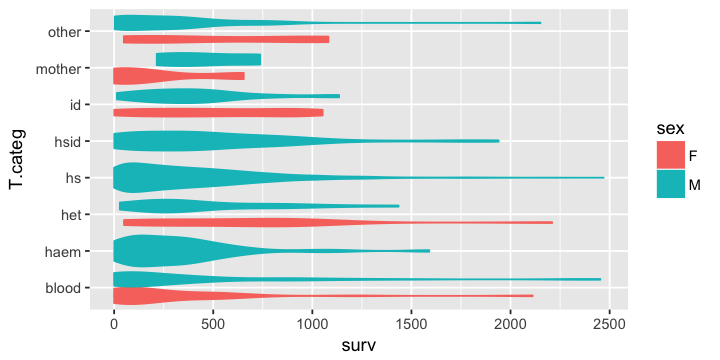

In [22]:
g1 + geom_violin() + coord_flip()

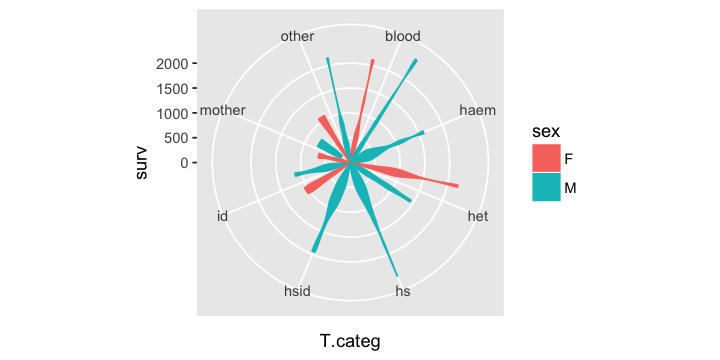

In [23]:
g1 + geom_violin() + coord_polar()

## Grouping with `facets`

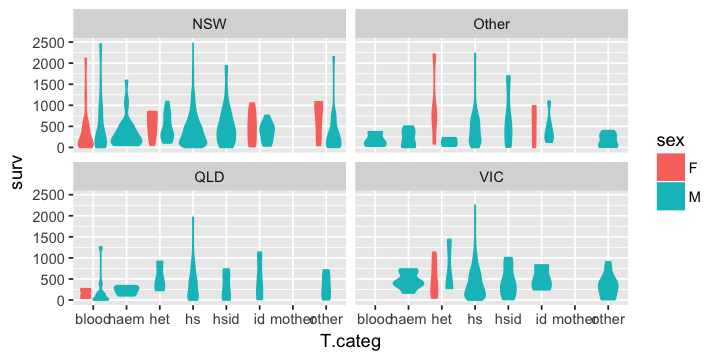

In [24]:
g1 + geom_violin() + facet_wrap(~ state)

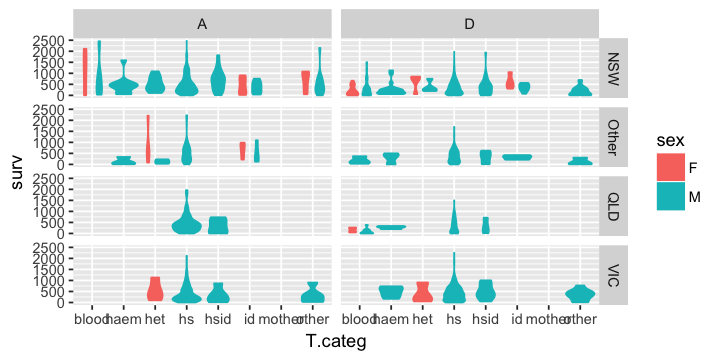

In [25]:
g1 + geom_violin() + facet_grid(state ~ status)

## Tuning with `scale`

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 29 rows containing non-finite values (stat_ydensity).”

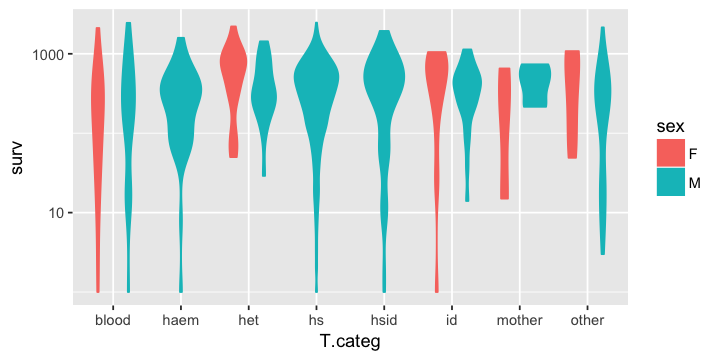

In [26]:
g1 + geom_violin() + scale_y_log10()

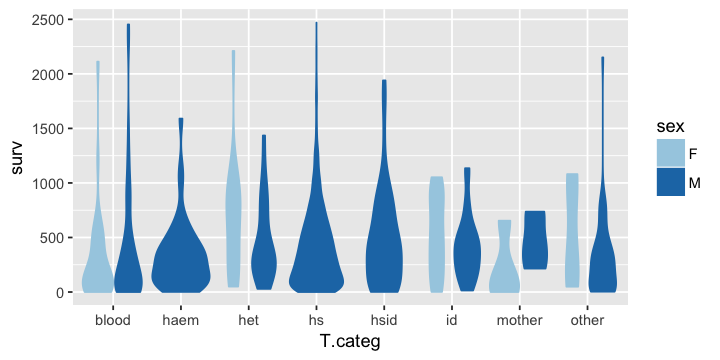

In [27]:
g1 + geom_violin() + 
scale_fill_brewer(type="qual", palette=3) + 
scale_color_brewer(type="qual", palette=3)

## Labels, legends and annotations

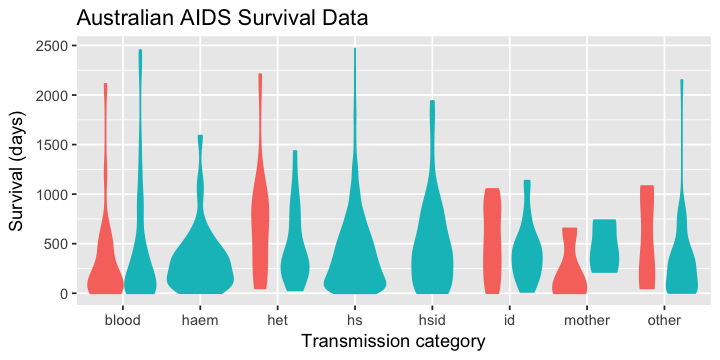

In [28]:
g1 + geom_violin() + 
labs(x="Transmission category", y="Survival (days)", title="Australian AIDS Survival Data") +
guides(color=F, fill=F)

## Layout and themes

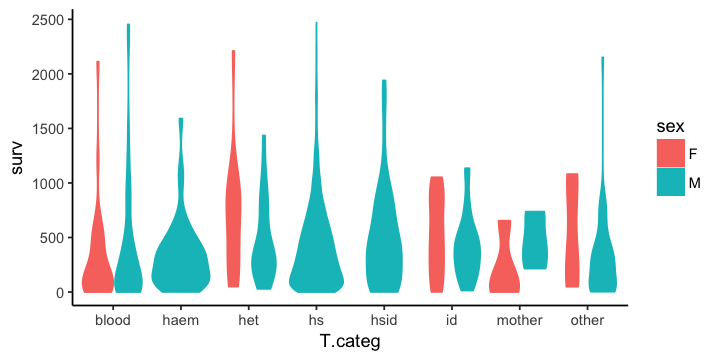

In [29]:
g1 + geom_violin() +
theme_classic()

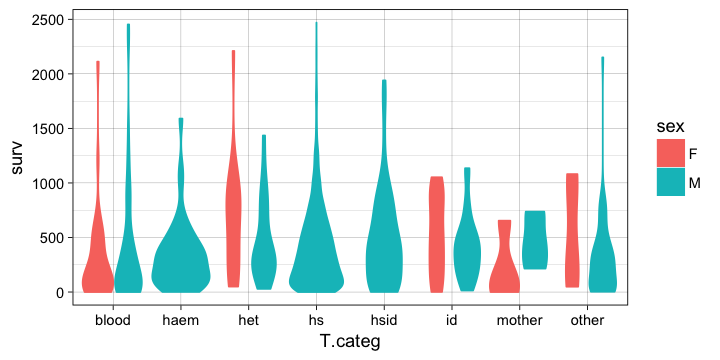

In [30]:
g1 + geom_violin() +
theme_linedraw()

### Raster plots

In [31]:
library(genefilter)

n <- 20
m <- 50000
EXPRS <- matrix(rnorm(m * 2 * n), m, 2*n)
rownames(EXPRS) <- paste('g', 1:m, sep='')
colnames(EXPRS) <- paste('pt', 1:(2*n), sep='')
grp <- as.factor(rep(c("Control", "Treated"), each=n))

p.values <- rowttests(EXPRS, grp)$p.value
ii <- order(p.values)
TOPEXPRS <- EXPRS[ii[1:100], ]

M <- data.frame(t(TOPEXPRS)) %>% rownames_to_column("pid") %>% gather(gene, expression, -pid)


Attaching package: ‘genefilter’

The following object is masked from ‘package:readr’:

    spec



In [32]:
head(M)

pid,gene,expression
pt1,g1980,-0.1082628
pt2,g1980,-0.6817481
pt3,g1980,-0.6059883
pt4,g1980,0.3678514
pt5,g1980,-1.2181737
pt6,g1980,-0.2223193


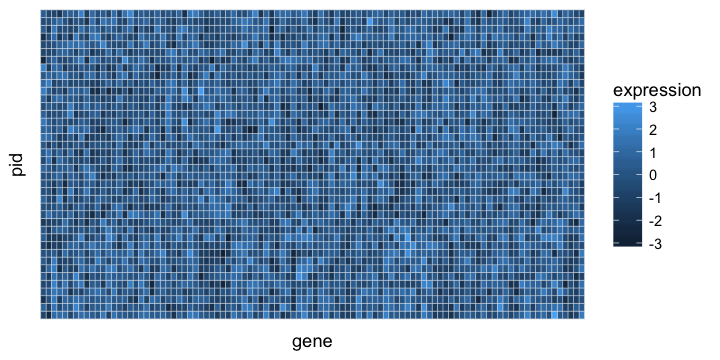

In [33]:
g2 <- ggplot(M, aes(gene, pid, fill=expression)) + 
      geom_tile(colour='white') + 
      theme(axis.text.x = element_blank(),
            axis.text.y = element_blank(),
            axis.ticks.x = element_blank(),
            axis.ticks.y = element_blank())
g2

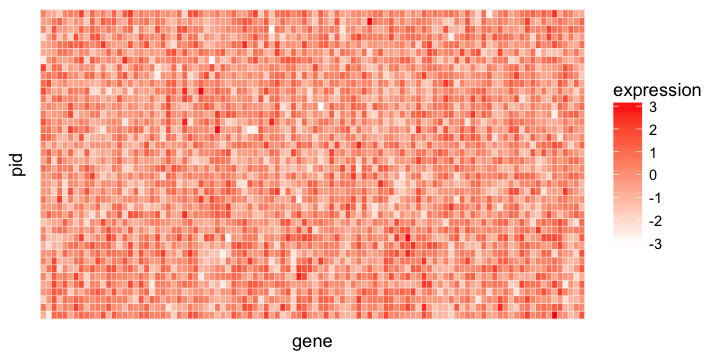

In [34]:
g3 <- g2 + scale_fill_gradient(low = "white", high="red")
g3

### Saving figures

In [35]:
ggsave("figs/iris.png", g)

Saving 7 x 7 in image


In [42]:
ggsave("figs/mtcars.pdf", g1, width=4, height=3)

In [48]:
ggsave("figs/expr.jpg", g2, scale = 0.5, width=8, height=4, dpi = 300)

![](figs/expr.jpg)